# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [1]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import numpy as np

from ppn2v.unet.model import UNet
from ppn2v import utils, training

from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from https://owncloud.mpi-cbg.de/index.php/s/31ZiGfcLmJXZk3X/download. Here we show the pipeline for Mouse skull nuclei dataset. Load the appropriate dataset at an appropriate path. For us, the path is data folder which exists at `../../../`. For Mouse skull nuclei, the data to be denoised is named ```example2_digital_offset300.tif```. 

In [2]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse skull nuclei'):
    os.mkdir('../../../data/Mouse skull nuclei')

zipPath="../../../data/Mouse_skull_nuclei.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://owncloud.mpi-cbg.de/index.php/s/31ZiGfcLmJXZk3X/download', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse skull nuclei")


### Load Data
#### Check ```filename``` and specify the ```dataname```  

In [3]:
path='../../../data/Mouse skull nuclei/'
fileName='example2_digital_offset300.tif'
dataName='mouseskullnuclei' # This will be used to name the noise2void model

Run the cells below

In [4]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse Skull Nuclei` dataset.

In [5]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.18373748250305652+-(2SEM)0.02222207520825013      
Epoch 1 finished      
avg. loss: 0.14988771192729472+-(2SEM)0.020023674408763945      
Epoch 2 finished      
avg. loss: 0.13213277831673623+-(2SEM)0.014418191199609565      
Epoch 3 finished      
avg. loss: 0.11386984623968602+-(2SEM)0.010461967347153931      
Epoch 4 finished      
avg. loss: 0.11938498131930828+-(2SEM)0.015325573523069229      
Epoch 5 finished      
avg. loss: 0.1149815034121275+-(2SEM)0.011634029328750852      
Epoch 6 finished      
avg. loss: 0.10191043689846993+-(2SEM)0.00927755441220953      
Epoch 7 finished      
avg. loss: 0.11985644325613976+-(2SEM)0.014566877443163179      
Epoch 8 finished      
avg. loss: 0.11337399482727051+-(2SEM)0.013483521383052994      
Epoch 9 finished      
avg. loss: 0.10470921248197555+-(2SEM)0.009239157680845683      
Epoch 10 finished      
avg. loss: 0.1160426266491413+-(2SEM)0.013866227962713732      
Epoch 11 finished      
avg. loss: 

Epoch    90: reducing learning rate of group 0 to 3.1250e-05.
Epoch 90 finished      
avg. loss: 0.11540892757475377+-(2SEM)0.010873536657759137      
Epoch 91 finished      
avg. loss: 0.10074781998991966+-(2SEM)0.01602590063869593      
Epoch 92 finished      
avg. loss: 0.11765110529959202+-(2SEM)0.014788242942155987      
Epoch 93 finished      
avg. loss: 0.10021786615252495+-(2SEM)0.01182732206402663      
Epoch 94 finished      
avg. loss: 0.11747899129986764+-(2SEM)0.01510868895812698      
Epoch 95 finished      
avg. loss: 0.12162645235657692+-(2SEM)0.017715642709534865      
Epoch 96 finished      
avg. loss: 0.10924939438700676+-(2SEM)0.013508588217950389      
Epoch 97 finished      
avg. loss: 0.10714847333729267+-(2SEM)0.009875634321183728      
Epoch 98 finished      
avg. loss: 0.10645717829465866+-(2SEM)0.01211349372591079      
Epoch 99 finished      
avg. loss: 0.10804547928273678+-(2SEM)0.012443397567204813      
Epoch 100 finished      
avg. loss: 0.12011439017951

Epoch 176 finished      
avg. loss: 0.12420675456523896+-(2SEM)0.017306708150872444      
Epoch 177 finished      
avg. loss: 0.10750579610466957+-(2SEM)0.013097185697454198      
Epoch 178 finished      
avg. loss: 0.10710144471377134+-(2SEM)0.015164517219025852      
Epoch 179 finished      
avg. loss: 0.10920045785605907+-(2SEM)0.016580780926126876      
Epoch 180 finished      
avg. loss: 0.11935828775167465+-(2SEM)0.013971717462832304      
Epoch 181 finished      
avg. loss: 0.11185443475842476+-(2SEM)0.011196886918356751      
Epoch 182 finished      
avg. loss: 0.11329552512615919+-(2SEM)0.014805272181374285      
Epoch 183 finished      
avg. loss: 0.10983970165252685+-(2SEM)0.013039066778962815      
Epoch 184 finished      
avg. loss: 0.10624307431280614+-(2SEM)0.014437978392182745      
Epoch 185 finished      
avg. loss: 0.1192232146859169+-(2SEM)0.014597760364634286      
Epoch 186 finished      
avg. loss: 0.11541200615465641+-(2SEM)0.01664735767117944      
Epoch   187:

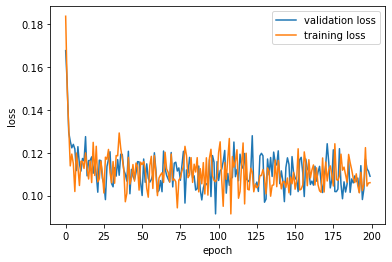

In [6]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()